In [70]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
strong_benchmark_file = "out/strong_scaling.json"
weak_benchmark_file = "out/weak_scaling.json"

EXCLUDE_FIRST_N = 1

In [72]:
with open(weak_benchmark_file) as f:
    weak = json.load(f)

with open(strong_benchmark_file) as f:
    strong = json.load(f)


In [73]:
# reshape data into dataframe
# data = {
#       processes": [1, 2, 4, 8, 16, 32, 64],
#      "runs": 5,
#      "time": list of list of times

def reshape(data):
    rows = []
    for p_i, p in enumerate(data["processes"]):
        for i, t in enumerate(data["times"][p_i]):
            rows.append({"processes": p, "run": i, "time": t, "base_size": data["base_size"]})
    return pd.DataFrame(rows)

In [74]:
weak_multi = reshape(weak)
weak_multi["type"] = "weak"
strong_multi = reshape(strong)
strong_multi["type"] = "strong"

strong_multi
weak_multi

,processes,run,time,base_size,type
0,1,0,25.461620,3000,weak
1,1,1,24.871348,3000,weak
2,1,2,25.227237,3000,weak
3,1,3,24.958621,3000,weak
4,1,4,24.943443,3000,weak
...,...,...,...,...,...
100,64,10,109.482564,3000,weak
101,64,11,115.102607,3000,weak
102,64,12,107.312999,3000,weak
103,64,13,99.243707,3000,weak


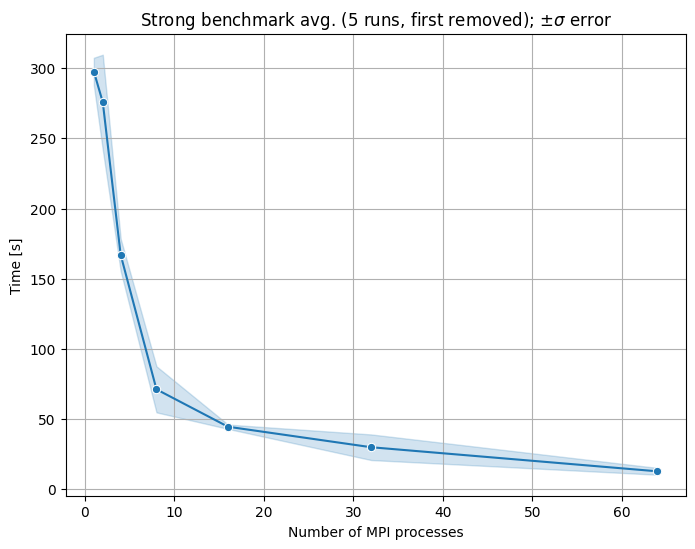

In [75]:
def plot_strong(data, name):
    # plot using seaborn lineplot
    plt.figure(figsize=(8, 6))
    sns.lineplot(x="processes", y="time", data=data, errorbar="sd", marker="o")

    plt.xlabel("Number of MPI processes")
    # plt.yscale("log")
    plt.ylabel("Time [s]")
    plt.grid()

    plt.title(f"Strong benchmark avg. ({strong['runs']} runs, first removed); $\pm\sigma$ error")

    plt.savefig(f"../../report/plots/{name}.pdf")

    plt.show()

plot_strong(strong_multi, "power_strong_scaling")


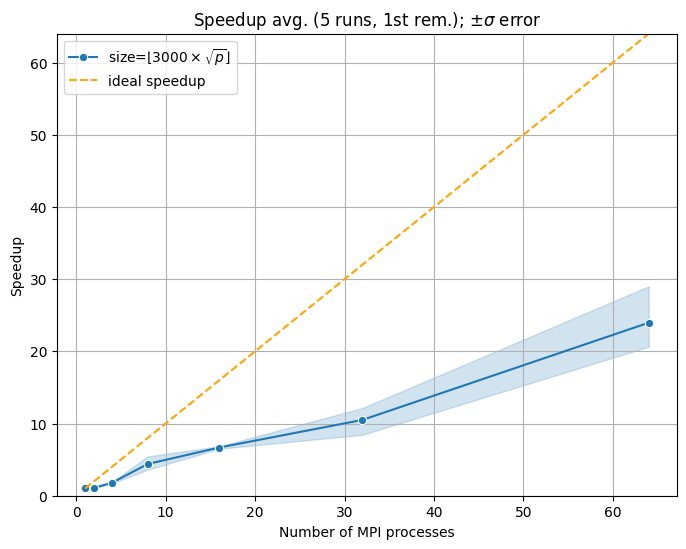

In [76]:
base_size = 3000
def plot_speeup(data, name):
    avg_time_single = data[data["processes"] == 1]["time"].mean()
    data["speedup"] = avg_time_single / data["time"]

    plt.figure(figsize=(8, 6))

    sns.lineplot(x="processes", y="speedup", data=data, marker="o", label=fr"size=$\lfloor {{{base_size}}} \times \sqrt{{p}}\rfloor$")

    # add speedup line
    plt.plot([1, 64], [1, 64], linestyle="--", color="orange", label="ideal speedup")

    plt.xlabel("Number of MPI processes")
    plt.ylabel("Speedup")
    plt.legend()
    plt.ylim(0, 64)
    plt.grid()

    plt.title(f"Speedup avg. ({strong['runs']} runs, 1st rem.); $\pm\sigma$ error")

    plt.savefig(f"../../report/plots/{name}.pdf")

    plt.show()
    
plot_speeup(strong_multi, "power_strong_speedup")

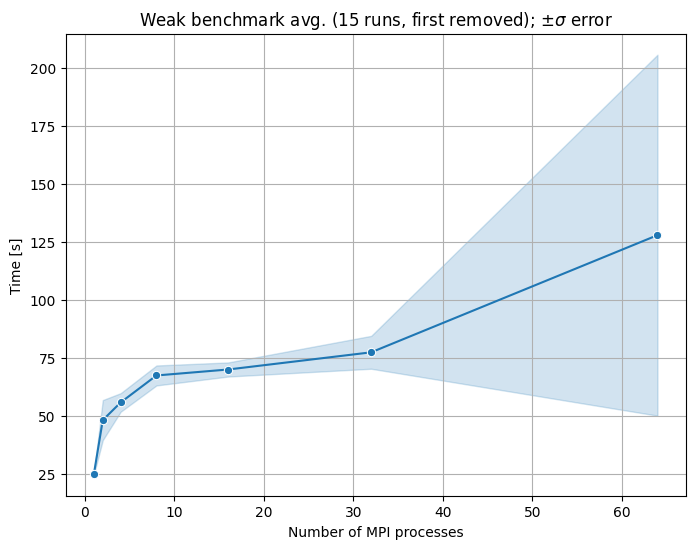

In [77]:
# weak scaling

def plot_weak(data, name):
    # plot using seaborn lineplot
    plt.figure(figsize=(8, 6))
    sns.lineplot(x="processes", y="time", data=data, errorbar="sd", marker="o")

    plt.xlabel("Number of MPI processes")
    plt.ylabel("Time [s]")
    plt.grid()

    plt.title(f"Weak benchmark avg. ({weak['runs']} runs, first removed); $\pm\sigma$ error")

    plt.savefig(f"../../report/plots/{name}.pdf")

    plt.show()

plot_weak(weak_multi, "power_weak_scaling")

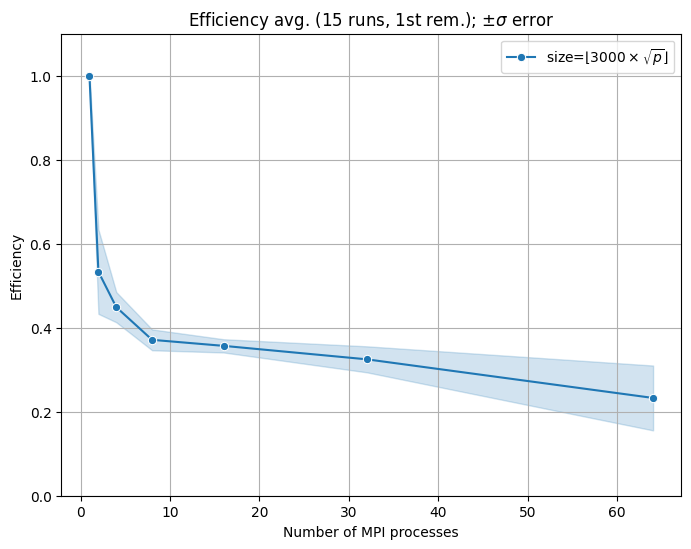

In [79]:
# plot weak scaling efficiency

def plot_weak_efficiency(data, name):
    avg_time_single = data[data["processes"] == 1]["time"].mean()
    # t(1) / t(p)
    data["efficiency"] = avg_time_single / data["time"]

    plt.figure(figsize=(8, 6))

    sns.lineplot(x="processes", y="efficiency", data=data, marker="o", label=fr"size=$\lfloor {{{base_size}}} \times \sqrt{{p}}\rfloor$", errorbar="sd")


    plt.xlabel("Number of MPI processes")
    plt.ylabel("Efficiency")
    plt.legend()
    plt.ylim(0, 1.1)
    plt.grid()

    plt.title(f"Efficiency avg. ({weak['runs']} runs, 1st rem.); $\pm\sigma$ error")

    plt.savefig(f"../../report/plots/{name}.pdf")

    plt.show()

plot_weak_efficiency(weak_multi, "power_weak_scaling_efficiency")